In [3]:
import pandas as pd
import missingno as msno
import seaborn as sns
import datetime, time
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import random

def fechadatetime(df):
    fechahoras = []
    fechas=[]
    for _,row in df.iterrows():
        fecha = str(int(row.DIA))+"/"+\
                str(int(row.MES))+"/"+\
                str(int(row.ANO))
        fechahora = fecha+"-"+str(int(row.HORA-1)) # para que sea de 0 a 23
        #print(fechahora)
        fechahoras.append(datetime.datetime.strptime(fechahora,"%d/%m/%Y-%H"))
        fechas.append(fecha)
    df['FECHAH'] = fechahoras
    df['FECHA'] = fechas
    df['FECHA'] = pd.to_datetime(df['FECHA'])
    return df

In [4]:
def histogram_boxplot(data, xlabel = None, title = None, font_scale=1.5, figsize=(7,5), bins = None):
    """ Boxplot and histogram combined
    data: 1-d data array
    xlabel: xlabel 
    title: title
    font_scale: the scale of the font (default 2)
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)

    example use: histogram_boxplot(np.random.rand(100), bins = 20, title="Fancy plot")
    """

    sns.set(font_scale=font_scale)
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=figsize)
    sns.boxplot(data, ax=ax_box2)
    sns.distplot(data, ax=ax_hist2, bins=bins) if bins else sns.distplot(data, ax=ax_hist2)
    if xlabel: ax_hist2.set(xlabel=xlabel)
    if title: ax_box2.set(title=title)
    plt.show()


def histogramas(df):
    dfNoNa = df.dropna()    
    for c in magnitudes:
        print(c)
        histogram_boxplot(dfNoNa['7day_rolling_avg'],c)

In [5]:
#Leemos el fichero de github.
fichero = "https://raw.githubusercontent.com/albercol/TFG/main/Fase2/Fase%202.1/DatosLimpios/Trafico.csv"
df =  pd.read_csv(fichero)
magnitudes = ['ES10','ES53','ES54']
df = fechadatetime(df)
df

,DIA,MES,ANO,HORA,ES10,ES53,ES54,FECHAH,FECHA
0,1,11,2018,1,304,387,314,2018-11-01 00:00:00,2018-01-11
1,1,11,2018,2,297,383,229,2018-11-01 01:00:00,2018-01-11
2,1,11,2018,3,165,340,152,2018-11-01 02:00:00,2018-01-11
3,1,11,2018,4,145,269,128,2018-11-01 03:00:00,2018-01-11
4,1,11,2018,5,144,297,106,2018-11-01 04:00:00,2018-01-11
...,...,...,...,...,...,...,...,...,...
24091,31,7,2021,20,531,698,490,2021-07-31 19:00:00,2021-07-31
24092,31,7,2021,21,531,680,488,2021-07-31 20:00:00,2021-07-31
24093,31,7,2021,22,484,654,448,2021-07-31 21:00:00,2021-07-31
24094,31,7,2021,23,484,580,411,2021-07-31 22:00:00,2021-07-31


In [6]:
festivos = pd.read_csv("https://raw.githubusercontent.com/albercol/TFG/main/Fase%201.3/Festividades/FESTIVOS.csv",sep=";")
festivos.columns = ["FECHA","DIA","TIPO","FESTIVIDAD","NOM_FESTIVIDAD"]

# los huecos en tipo parecen ser todos días laborables
festivos["TIPO"].fillna("laborable", inplace=True)
#eliminabos los nulos de FECHA y DIA.
festivos.dropna(subset=["FECHA","DIA"],inplace=True)

#Convertimos FECHA a dateTime 
festivos["FECHA"] = pd.to_datetime(festivos['FECHA'])

#Transformamos la columna tipo en mayúsculas.
festivos["TIPO"] = festivos["TIPO"].str.upper()

#Filtramos el dataframe quedandonos solo con las columnas FECHA y TIPO
festivoscols = festivos[["FECHA","TIPO"]]

# añadir la información de un dataframe al otro
# left join
df = df.merge(festivoscols, on='FECHA', how = 'left')
df

,DIA,MES,ANO,HORA,ES10,ES53,ES54,FECHAH,FECHA,TIPO
0,1,11,2018,1,304,387,314,2018-11-01 00:00:00,2018-01-11,FESTIVO
1,1,11,2018,2,297,383,229,2018-11-01 01:00:00,2018-01-11,FESTIVO
2,1,11,2018,3,165,340,152,2018-11-01 02:00:00,2018-01-11,FESTIVO
3,1,11,2018,4,145,269,128,2018-11-01 03:00:00,2018-01-11,FESTIVO
4,1,11,2018,5,144,297,106,2018-11-01 04:00:00,2018-01-11,FESTIVO
...,...,...,...,...,...,...,...,...,...,...
24091,31,7,2021,20,531,698,490,2021-07-31 19:00:00,2021-07-31,LABORABLE
24092,31,7,2021,21,531,680,488,2021-07-31 20:00:00,2021-07-31,LABORABLE
24093,31,7,2021,22,484,654,448,2021-07-31 21:00:00,2021-07-31,LABORABLE
24094,31,7,2021,23,484,580,411,2021-07-31 22:00:00,2021-07-31,LABORABLE


In [7]:
def muestraMes(df,row,c):
    month = row.MES
    year = row.ANO
    dfmes = df[(df.MES==month) & (df.ANO==year)]
    fig, ax = plt.subplots(1,figsize=(20, 4),dpi=100)
    ax.plot(dfmes.FECHAH,dfmes[c],label=str(int(year))+"/"+str(int(month))+". "+c+"Estandar")
    ax.plot(dfmes.FECHAH,dfmes['7day_rolling_avg'],label=str(int(year))+"/"+str(int(month))+". "+c+"rolling_Avg")
    ceros = dfmes[dfmes[c]==0]
    ax.scatter(ceros.FECHAH,ceros[c],color="red",s=8)
    if row[c]!=0: # señalar el día
        ax.scatter(row.FECHAH,row[c],color="green",s=20)
    fig.autofmt_xdate(rotation=45)
    plt.legend()
    plt.show()

ES10


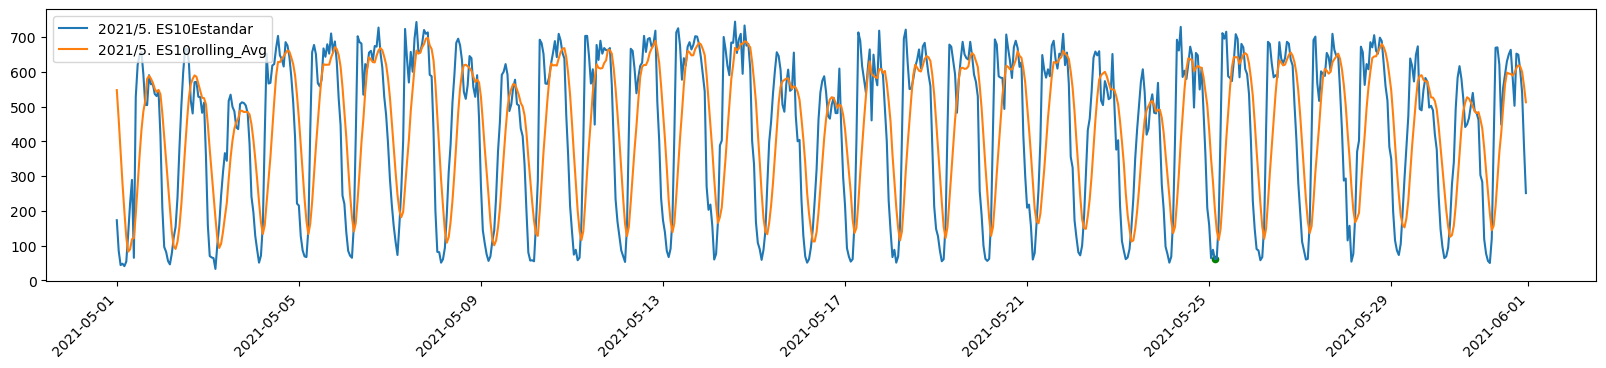

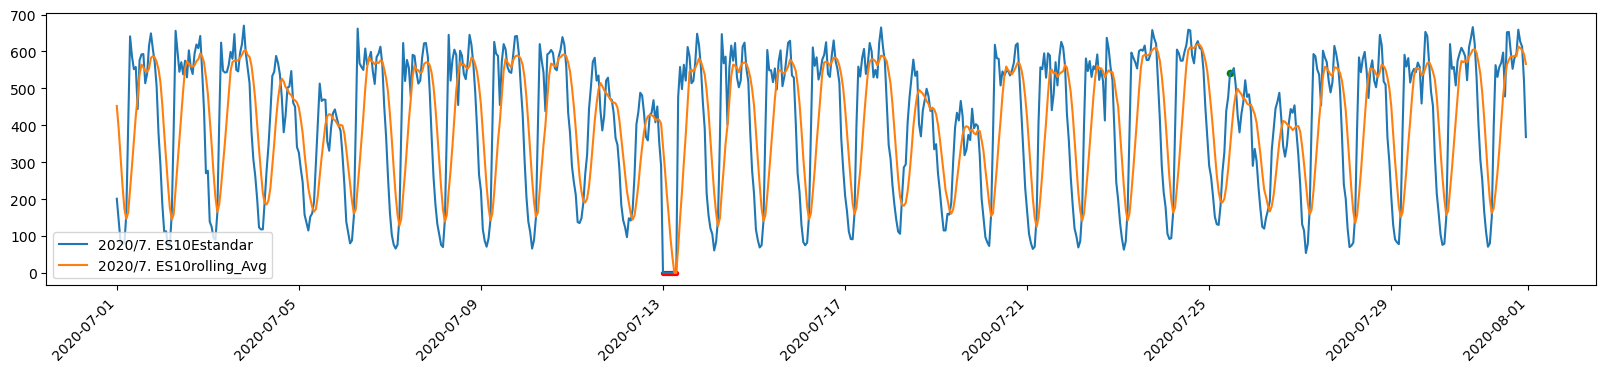

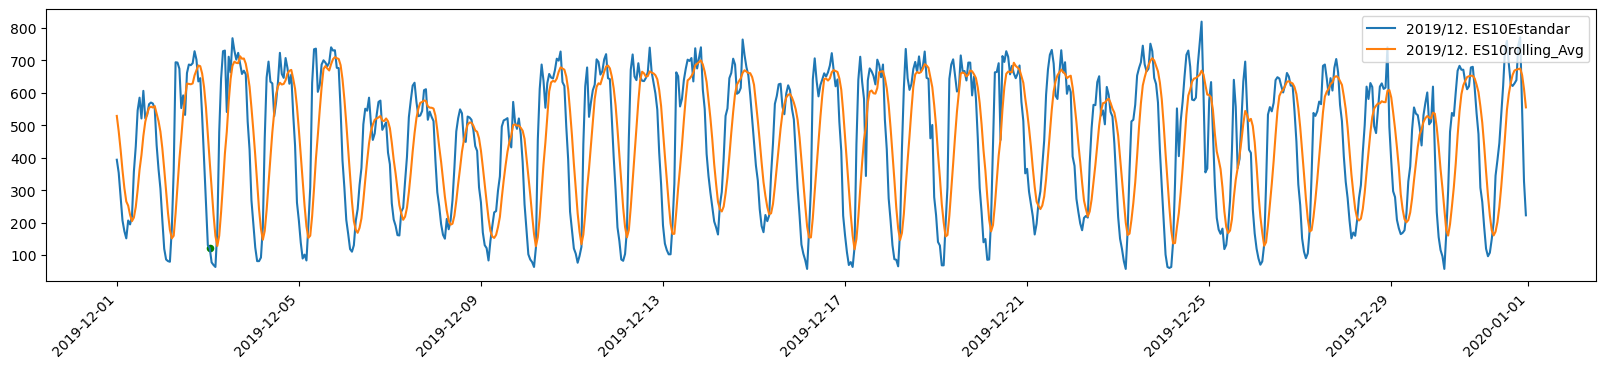

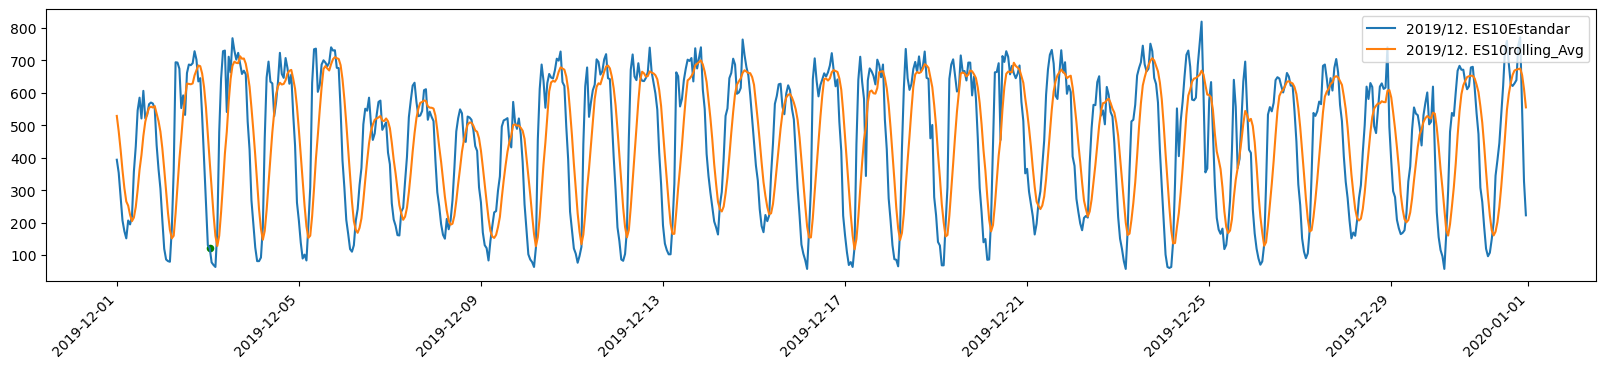

ES10


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


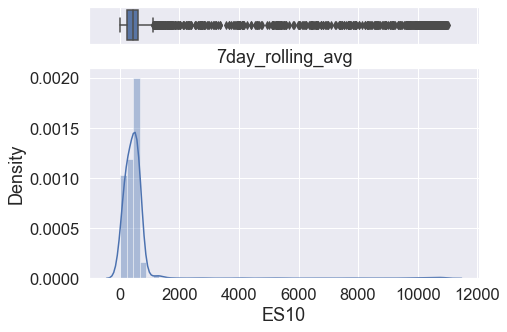

ES53


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


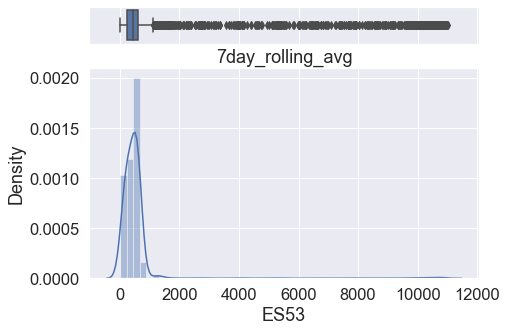

C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ES54


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


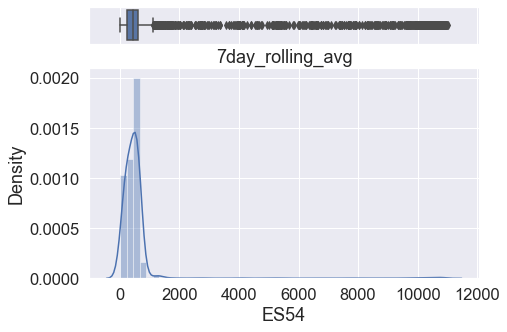

ES53


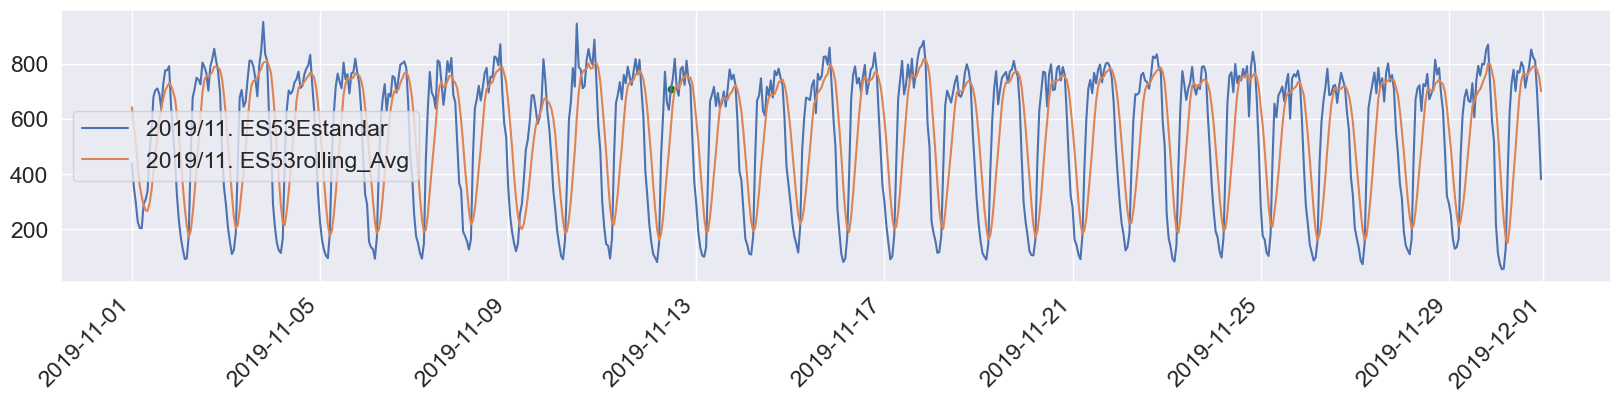

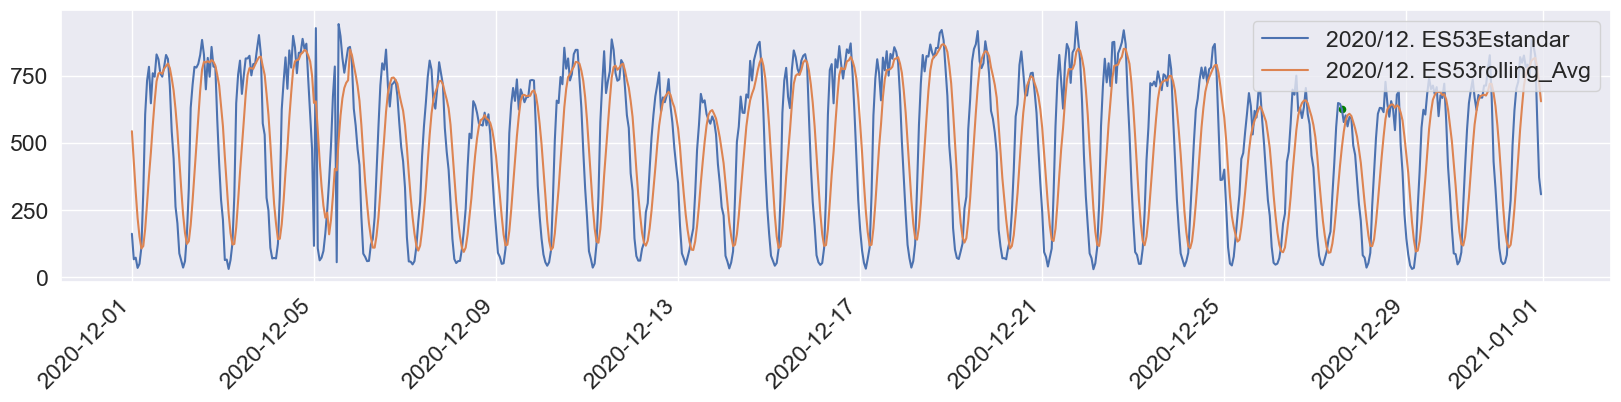

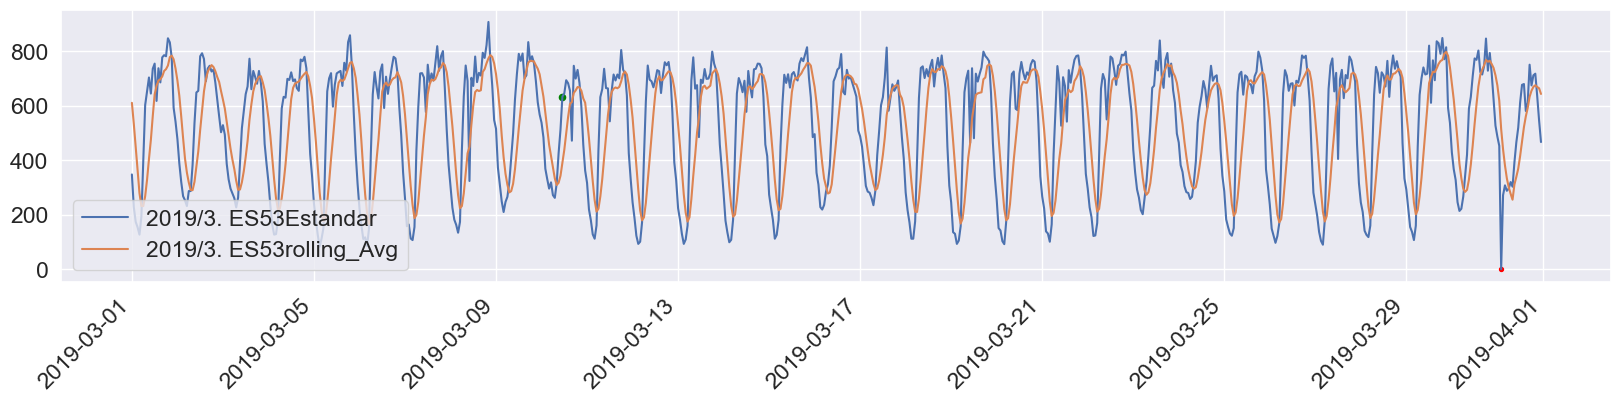

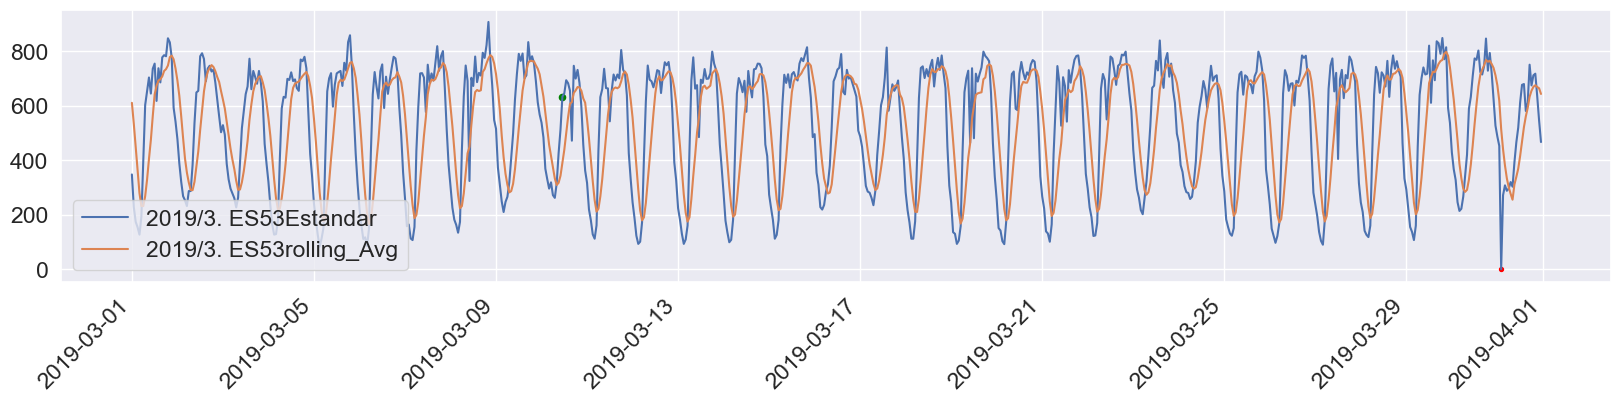

ES10


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


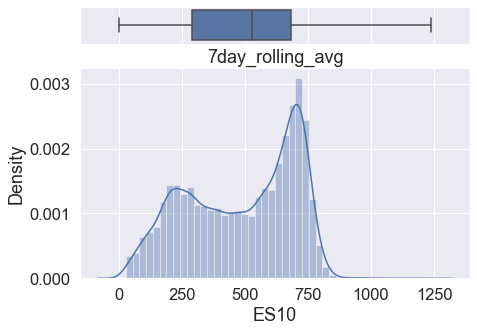

ES53


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


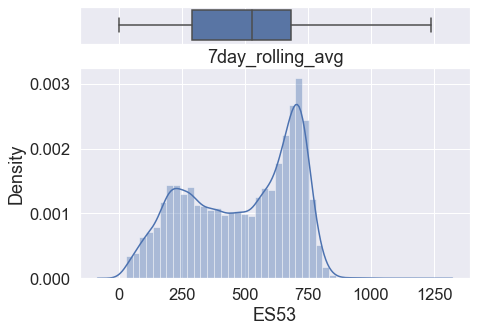

ES54


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


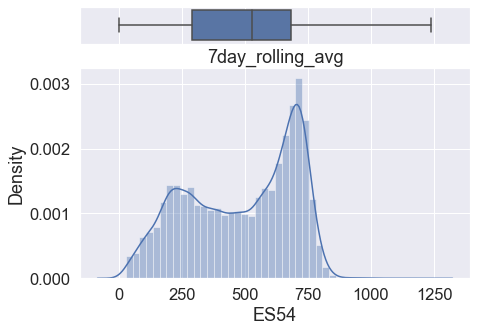

ES54


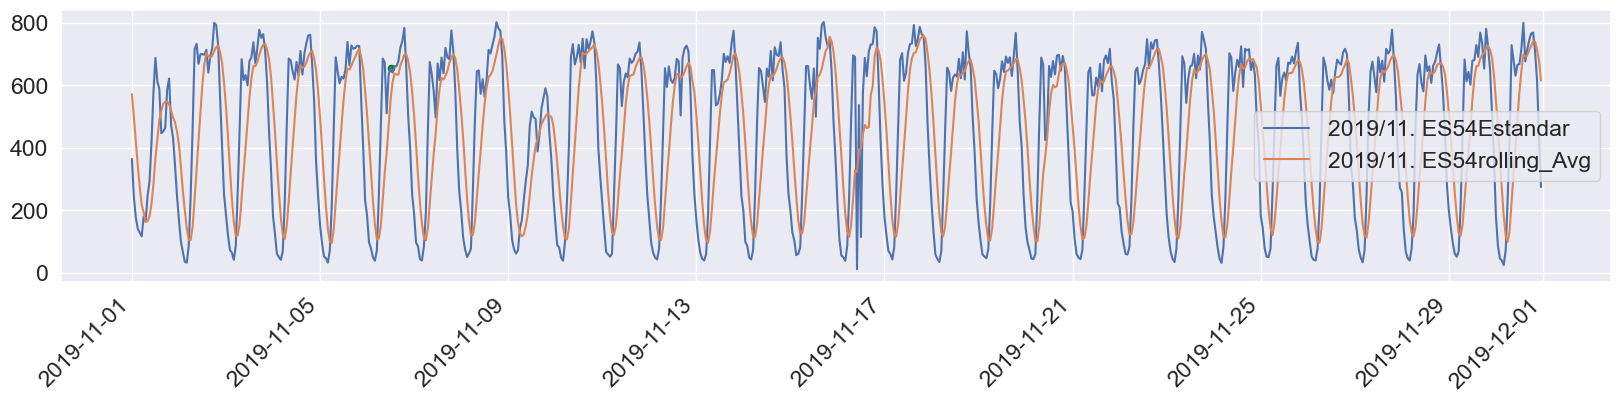

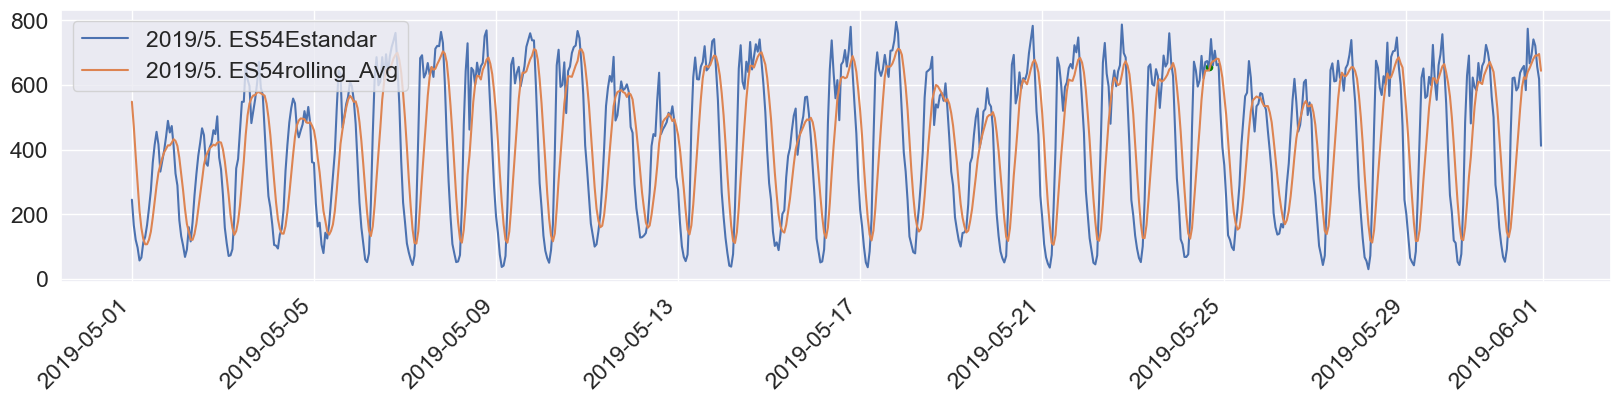

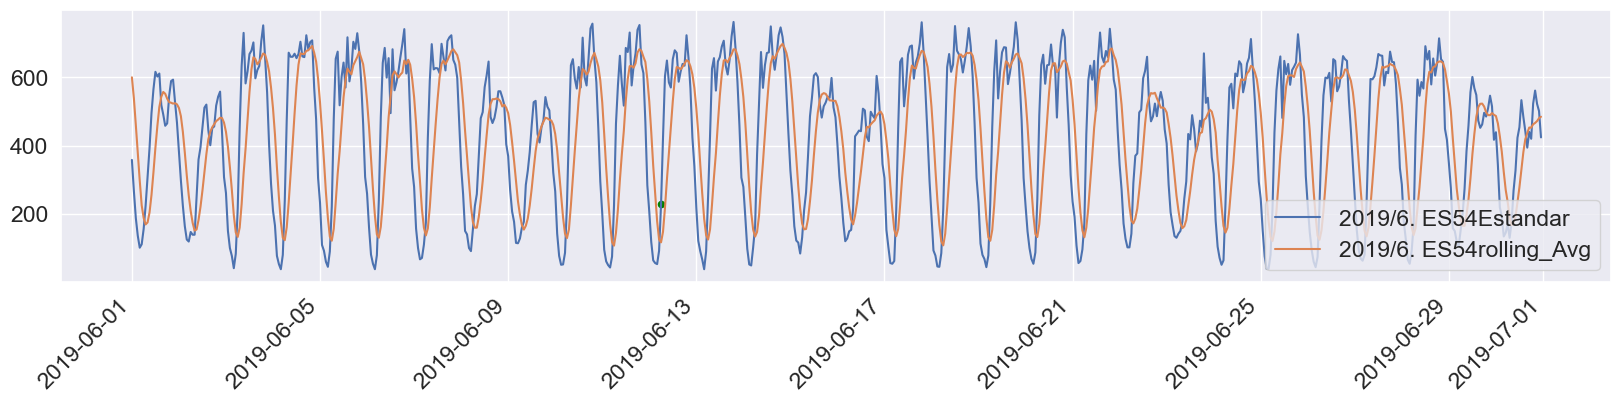

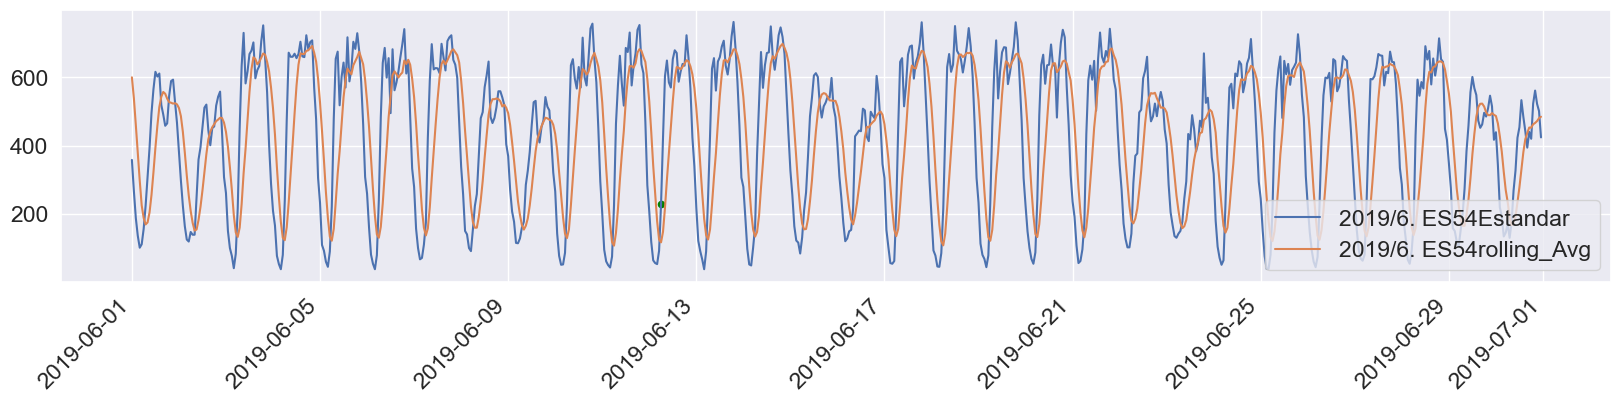

ES10


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


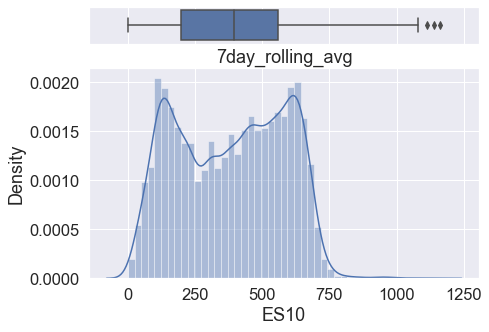

ES53


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


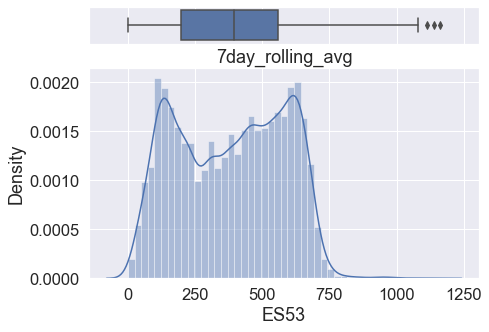

ES54


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


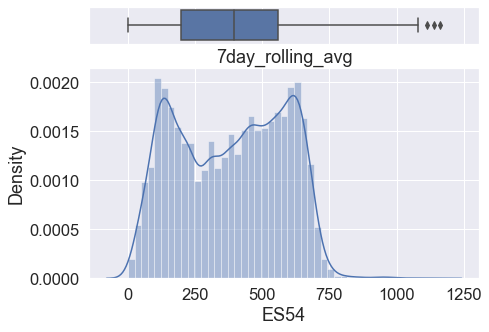

,DIA,MES,ANO,HORA,ES10,ES53,ES54,FECHAH,FECHA,TIPO,7day_rolling_avg
0,1,11,2018,1,304,387,314,2018-11-01 00:00:00,2018-01-11,FESTIVO,NaN
1,1,11,2018,2,297,383,229,2018-11-01 01:00:00,2018-01-11,FESTIVO,NaN
2,1,11,2018,3,165,340,152,2018-11-01 02:00:00,2018-01-11,FESTIVO,NaN
3,1,11,2018,4,145,269,128,2018-11-01 03:00:00,2018-01-11,FESTIVO,NaN
4,1,11,2018,5,144,297,106,2018-11-01 04:00:00,2018-01-11,FESTIVO,NaN
...,...,...,...,...,...,...,...,...,...,...,...
24091,31,7,2021,20,531,698,490,2021-07-31 19:00:00,2021-07-31,LABORABLE,463.428571
24092,31,7,2021,21,531,680,488,2021-07-31 20:00:00,2021-07-31,LABORABLE,454.857143
24093,31,7,2021,22,484,654,448,2021-07-31 21:00:00,2021-07-31,LABORABLE,442.857143
24094,31,7,2021,23,484,580,411,2021-07-31 22:00:00,2021-07-31,LABORABLE,447.571429


In [8]:
from scipy import stats
dias = ['LABORABLE', 'SÁBADO', 'DOMINGO']

for c in magnitudes:
    #Imprimimos para cada magnitud CO, NO, NOx...
    print(c)
    df['7day_rolling_avg'] = df[c].rolling(7).mean() #el siete estipula lo que paso 7 dias antes.
    for tipo in dias:
        df_tipo = df[(df.TIPO==tipo)].dropna(subset=[c])
        maxdiarios = df_tipo.groupby("DIA")['7day_rolling_avg'].max()
        mediana = maxdiarios.median()
        mad = stats.median_abs_deviation(df_tipo['7day_rolling_avg'], scale=1)
       
        #valores cuya distancia a la mediana superan una cantidad de veces el mad.
        #normalmente el valor a utilizar suele ser 3, que obedece a una función normal.
        
        #outliers = (df_tipo[c]-mediana)>3*mad
        #df_out = df_tipo[outliers]
        #if len(df_out)>0:
        #   print("Tipo: ",tipo,"mediana ",mediana,"mad ",mad,len(df_out))        
        row = df.iloc[random.randint(0,len(df)-1)]
            #print(row)
        muestraMes(df,row,c)
            #Quitamos el outlayer que esta en df_out.
       #     df = df[~df.FECHAH.isin(df_out.FECHAH)]

    
    muestraMes(df,row,c)
    histogramas(df)
df